_Alejandro de León Fernández_

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [66]:
## cargar el dataset

In [67]:
!pip install ucimlrepo

In [68]:
from ucimlrepo import fetch_ucirepo
air_quality = fetch_ucirepo(id=360)
data = air_quality.data.features

In [69]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [71]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [72]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [73]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [74]:
data.shape

(9357, 15)

In [75]:
## ¿cuántas instancias tiene el dataset?
print(f"Número de instancias: {len(data)}")

Número de instancias: 9357


El dataset contiene 9357 instancias.

In [76]:
## ¿cuál es el tipo de datos de cada una de las columnas?
print(data.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object


Las columnas Date y Time son de tipo objeto. Las columnas CO(GT), C6H6(GT), T, RH y AH son de tipo decimal utilizando 64 bits para almacenar cada valor y el resto son de tipo enteros utilizando 64 bits para almacenar cada valor.

In [77]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
import pandas as pd

columnas_categoricas = data.select_dtypes(include=['object','category']).columns.tolist()
columnas_continuas = data.select_dtypes(include=['number']).columns.tolist()

print("Categóricas:", columnas_categoricas)
print("Continuas:", columnas_continuas)
print(f'Hay {len(columnas_categoricas)} columnas categóricas')
print(f'Hay {len(columnas_continuas)} columnas continuas')

Categóricas: ['Date', 'Time']
Continuas: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
Hay 2 columnas categóricas
Hay 13 columnas continuas


Al emplear la libreria Pandas se obtiene que en el dataset hay 2 columnas categóricas y 13 columnas continuas pero según la documentación del Dataset, las columnas categoricas son 'Time', y todas las 'PT08.SX'. Las columnas continuas son 'C6H6(GT)', 'T', 'RH' y 'AH'.

In [78]:
## ¿existen valores nulos en el dataset?
data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


El dataset no contiene valores NaN, pero en la documentación se especifica que los valores faltantes estan representados con un -200.

In [79]:
import numpy as np
data.replace(to_replace= -200, value=np.NaN, inplace=True)

Una vez convertidos los valores faltantes a valores NaN, se pueden mostrar la cantidad en cada columna del Dataset:

In [80]:
data.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


<Axes: >

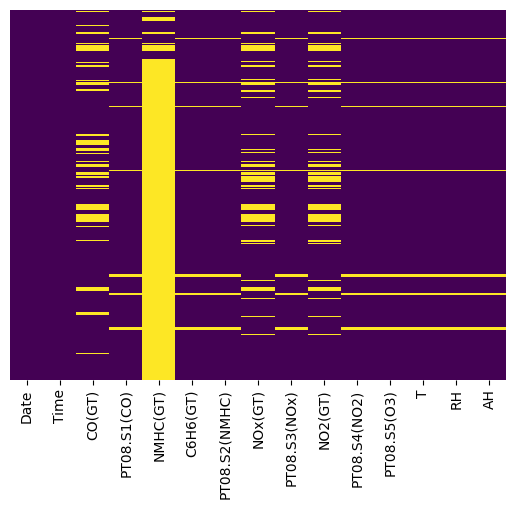

In [81]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Se puede apreciar que la columna NMHC(GT) tiene muchos valores faltantes, mas del 85% de los valores son NaN. Esta columna la podemos eliminar ya que no va a aportar ninguna informacion relevante al dataset.

In [82]:
data.drop('NMHC(GT)', axis=1, inplace=True)

<Axes: >

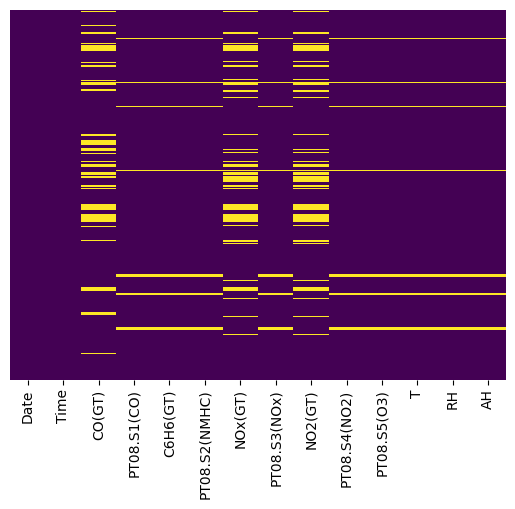

In [83]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Para limpiar el dataset se pueden remplazar los valores NaN por la media de toda la columna, pero esto no es preciso ni adecuado para rellenar dichos valores. Lo mejor seria rellenar los valores NaN con la media del dato de ese dia en concreto.

In [84]:
data["CO(GT)"] = data.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NOx(GT)"] = data.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
data["NO2(GT)"] = data.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

In [85]:
data.isnull().sum()

,0
Date,0
Time,0
CO(GT),864
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),816
PT08.S3(NOx),366
NO2(GT),816
PT08.S4(NO2),366


<Axes: >

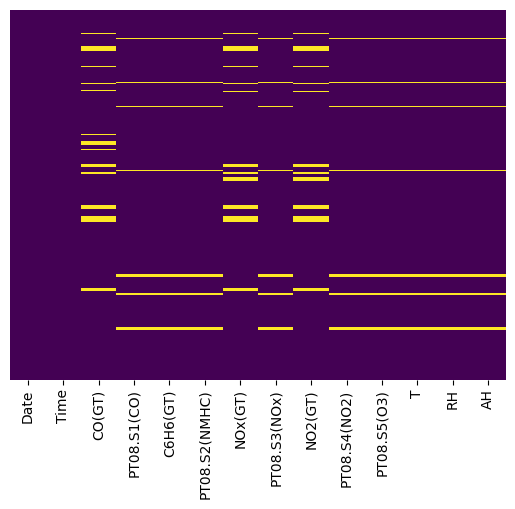

In [86]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
data.ffill(inplace=True)

In [88]:
data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0


In [89]:
data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.730362,10.190392,942.548253,239.419651,832.742225,109.382418,1453.014535,1030.511916,18.317356,48.817431,1.017382
std,1.383347,219.588101,7.565771,269.581368,200.833596,255.709423,46.058214,347.434084,410.916759,8.821883,17.354326,0.404829
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.900000,35.400000,0.726200
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [90]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

En este caso se va a tomar como variable respuesta la columna C6H6(GT): Benceno que se mide en microgramos por m3. Esta variable es de tipo numérica continua, ya que representa valores medidos en unidades fisicas (mg/m3) que pueden tomar un amplio rango de valores.

In [91]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?
estadisticos = data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()
print(estadisticos)

            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean      2.082589   239.419651   109.382418
std       1.383347   200.833596    46.058214
min       0.100000     2.000000     2.000000
25%       1.100000   102.000000    76.000000
50%       1.700000   177.000000   103.608696
75%       2.700000   316.000000   135.000000
max      11.900000  1479.000000   340.000000


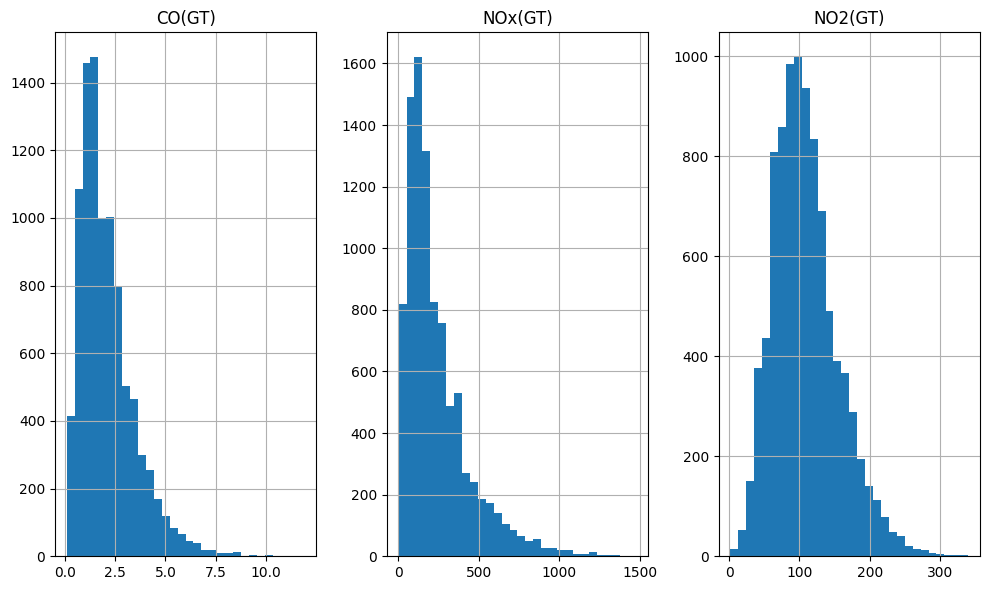

In [92]:
import matplotlib.pyplot as plt

data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].hist(bins=30, figsize=(10, 6), layout=(1, 3))
plt.tight_layout()
plt.show()

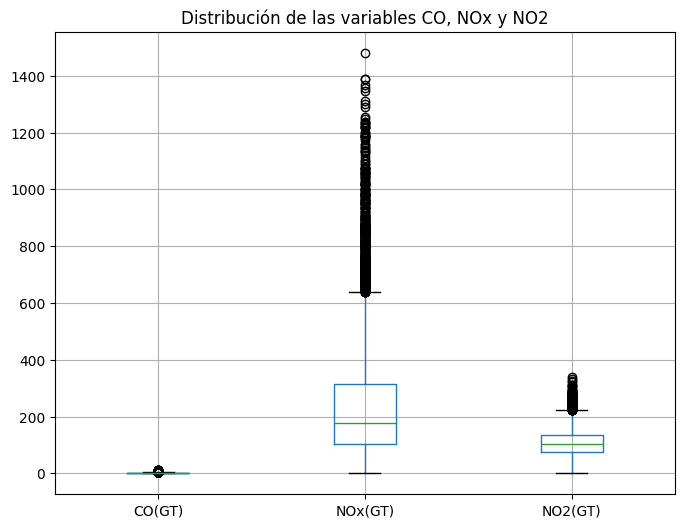

In [93]:
data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].boxplot(figsize=(8,6))
plt.title("Distribución de las variables CO, NOx y NO2")
plt.show()

En cuanto a las mediciones de CO(GT), la mayoria son valores bajos con una media de 2,08 y una mediana de 1,7. Esto puede indicar que los niveles de monoxido de carbono son, en general, bajos exceptuando alguna medicion mas alta. Tambien se puede apreciar algun valor por encima del percentil 75, que indica la presencia de valores atipicos (picos de contaminacion) y la distribucion esta sesgada con pocos valores sumamente altos.<br>
En cuanto a las mediciones de NOx(GT), la media y la mediana estan algo separadas, sugiriendo una distribucion sesgada con valores altos ocasionales. La variacion estandar es elevada (200,83) indicando que hay gran variabilidad en los niveles de NOx. El rango es muy amplio y el valor máximo (1479) es extremadamente alto comparado con el percentil 75 (316). Esto confirma la existencia de valores extremos en esta variable. Estos valores suelen estar asociados con tráfico intenso o zonas industriales.<br>
Para las mediciones de NO2(GT) la media y la mediana estan cerca por lo que indica una distribucion menos sesgada en comparacion con las otras variables. Existe un valor maximo de 340 pero la mayoria de los valores estan concentrados en un rango cercano a la media. Esta variable probablemente refleja mejor la exposición típica al dióxido de nitrógeno, con menos picos extremos que NOx.

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

La variable CO(GT) tiene una distribución sesgada positivamente y la mayoria de los valores estan entre 0 y 3, exceptuando algunos valores más altos. Los valores superiores a 10 pueden ser outliers ya que están alejados de la densidad principal.<br>La variable NOx(GT) también muestra una distribución sesgada a la derecha y la mayoria de los valores se encuentran entre 0 y 500, con algunos valores anómalos superiores a 1000, con muy baja frecuencia.<br>La variable NO2(GT) tiene una distribución casi simetrica, mas parecida a una distribucion normal. La mayoria de los valores se encuentran en el rango de 50 a 150.

In [94]:
## ¿cómo son las correlaciones entre las variables del dataset?

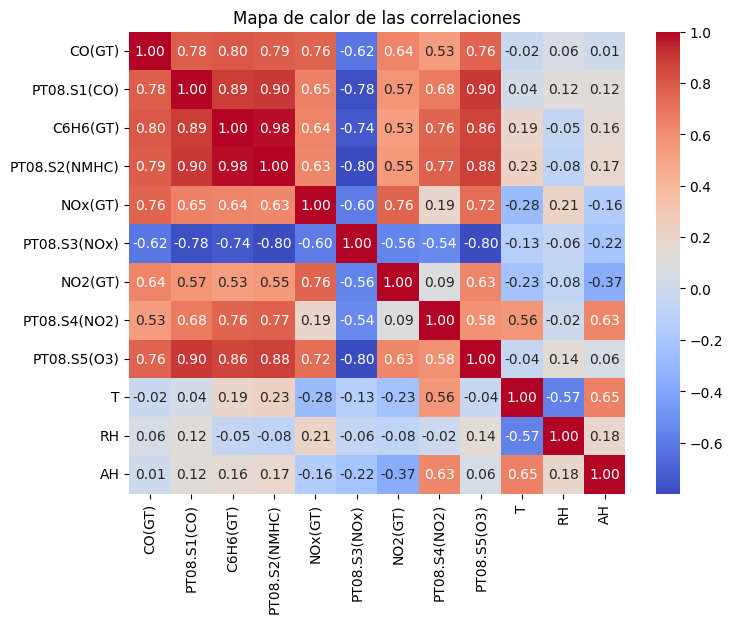

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

correlaciones = data.drop(['Date','Time'], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de calor de las correlaciones")
plt.show()

_indica aquí tu respuesta_

In [96]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

Como se puede apreciar en la matriz de correlación, las 3 variables mas correlacionadas con el C6H6(GT) son el CO, el NMHC y el O3 provenientes de los sensores.

In [97]:
## ¿existe alguna variable que no tenga correlación?

Las variable NO2 del sensor, T, RH y AH tienen muy poca o ninguna correlacion con la variable objetivo.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

En base al EDA

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [98]:
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame


#scaler = StandardScaler()

#X_train = DataFrame(scaler.fit_transform(X_train))
#X_test = DataFrame(scaler.fit_transform(X_test))

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [100]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
X = data[['PT08.S2(NMHC)']]
y = data['C6H6(GT)']

In [101]:
# separar datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7485, 1) (1872, 1) (7485,) (1872,)


In [102]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [103]:
# entrena el modelo con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [105]:
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [7.41264548]
Intercepto: 10.186105544422176


El coeficiente β1 es de 7,4126. Este valor indica la pendiente de la linea de regresión y muestra cuánto cambia la variable dependiente (y) por cada unidad de cambio de la variable independiente (X).<br> El intercepto es el punto donde la línea de regresión corta el eje y, en conclusion, el valor predicho de y cuando la variable X = 0. En este caso es 10,1861.


In [106]:
# realiza las predicciones para el conjunto de datos de test

In [107]:
y_pred = model.predict(X_test)

In [108]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²", r2)

RMSE: 1.4473912281857724
R² 0.9642134940298724


En este caso se va a evuluar el modelo con el RMSE ya que los errores estan en las mismas unidades y el R² para comprender como de bien el modelo explica la variabilidad de los datos.

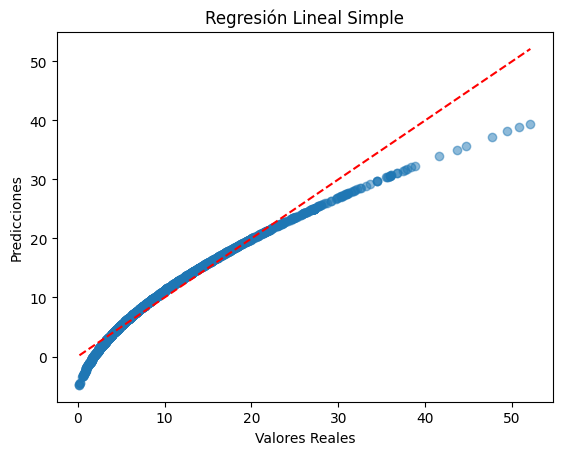

In [109]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal Simple")
plt.show()

In [110]:
# ¿Qué error tiene el modelo? Explícalo.

El RMSE es 1,4474. Esto significa que, en promedio, las predicciones del modelo tienen un error absoluto de aproximadamente 1,4474 unidades con respecto a los valores reales. En este caso, el R2=0.9642 significa que el modelo explica el 96.42% de la variación en los datos de la variable objetivo. Esto sugiere que el modelo tiene un rendimiento excelente. En conclusion, se puede decir que el modelo tiene un error bajo, por lo que tiene un buen rendimiento, y la varianza explicada es alta, por lo que el modelo es fiable para este caso.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [111]:
X = data.drop(['C6H6(GT)','T','Time','Date'], axis=1)
y = data['C6H6(GT)']

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [114]:
prediccion = lm.predict(X_test)

In [115]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.9755043251693544

In [116]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, prediccion))
print('MSE:',metrics.mean_squared_error(y_test, prediccion))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediccion)))
print('R2: ',r2_score(y_test, prediccion))

MAE: 0.8479201195811599
MSE: 1.4339763308731048
RMSE: 1.1974875076062819
R2:  0.9755043251693544


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

El MAE es de 0,8479 unidades, lo que indica cuanto de media se desvia cada prediccion del valor real. El MSE es de 1,4340 y representa el promedio de los errores al cuadrado. El RMSE indica que la desviacion promedio en la misma unidad que la variable objetivo es de 1,1975.
En conclusión, el modelo de regresion lineal multiple es claramente mejor que el modelo simple. Este tiene un menor error absoluto medio, un menor error cuadratico medio y explica mas varibilidad en los datos (R2 mas alto). Esto se debe a que las variables adicionales incluidas en el modelo múltiple tienen un impacto significativo para mejorar la prediccion de la varible objetivo 'C6H6(GT)'.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

* criterion: Es el criterio que mide la calidad de la división en cada nodo del árbol. Se emplea para determinar cómo se evalua la calidad de las divisiones en los datos.
* splitter: Define la estrategia utilizada para dividir en los nodos, existen las opciones de "best" y "random". Este parametro afecta a la aleatoriedad del modelo y en el tiempo de entrenamiento.
* max_depth: Este parametro define la profundidad máxima del árbol. Hay que tenerlo en cuenta ya que un valor bajo puede causar underfitting y un valor muy alto puede causar overfitting.
* min_samples_split: Indica el número mínimo de muestras necesarias para dividir un nodo. Es importante ya que controla la creación de nodos. Los valores altos previenen divisiones excesivas reduciendo el overfitting.
* min_samples_leaf: Es el número mínimo de muestras necesarias en un nodo hoja. Los nodos hoja que tienen pocas muestras son susceptibles a ser muy específicos y pueden llevar a overfitting. Aumentar este parametro ayuda a simplicar el árbol.
* max_features: Es el número máximo de características que se tienen en cuenta al dividir un nodo. En ocasiones, limitar las características puede introducir aleatoriedad y mejorar la generalización, sobretodo en conjuntos grandes o en combinación con otros modelos como por ejemplo, Random Forests.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Este parámetro representa la cantidad mínima de reducción en la impureza, que se mide segun el criterio seleccionado (squared_error o absolute_error), necesaria para que un nodo se divida. Este parámetro es útil para evitar divisiones insignificantes, reducir el overfitting y simplificar el árbol.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

X = data.drop(columns=["C6H6(GT)","Date","Time"])
y = data["C6H6(GT)"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = DecisionTreeRegressor(
    criterion="poisson",
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [120]:
y_pred = model.predict(X_test)

In [121]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 0.03007429367623093


Calcula MAE, R2 y RMSLE

In [122]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"Raíz del error cuadrático medio (RMSLE): {rmsle}")

Error absoluto medio (MAE): 0.02296593591510359
Coeficiente de determinación (R²): 0.999486260614772
Raíz del error cuadrático medio (RMSLE): 0.00532485362813186


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [123]:
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmsle_train = np.sqrt(mean_squared_log_error(np.maximum(y_train, 1e-9), np.maximum(y_train_pred, 1e-9)))

print(f"Entrenamiento - MSE: {mse_train}, MAE: {mae_train}, R²: {r2_train}, RMSLE: {rmsle_train}")

Entrenamiento - MSE: 0.020371420484618857, MAE: 0.011186603328328435, R²: 0.9996420304727365, RMSLE: 0.003514813073454801


El R² en ambos conjuntos es prácticamente igual (0.9996 en entrenamiento y 0.9995 en prueba), lo que indica que el modelo explica bien los datos en ambos casos. Aunque el MSE, MAE, y RMSLE son ligeramente mayores en el conjunto de prueba, las diferencias no son significativas. No hay signos evidentes de overfitting. El modelo parece estar generalizando bien, dado que el rendimiento en entrenamiento y prueba es muy similar.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

Este modelo tiene un MAE de 0,02297, menor que el de la regresón múltiple y claramente mejor que el modelo simple. Esto nos dice que, de media, las predicciones del modelo de arbol estan mucho más cerca de los valores reales.<br>El RMSLE es de 0,00532, menor que los errores de los modelos lineales. Esto indica que el modelo de árboles es muy bueno para manejar valores relativos y errores pequeños. El R2 es de 0,9995, indicando que este modelo captura casi toda la varibilidad de los datos, mucho mejor que los modelos de regresion lineal. El valor alto de R2 muestra la capacidad de este modelo para ajustarse bien a los datos.<br>En conclusión, el modelo de árboles de decisión es mejor que los de regresión lineal según las métricas evaluadas.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

El preprocesamiento de datos (escalado, eliminación de valores atípicos y nulos) permitió mejorar la calidad del dataset, la selección de hiperparámetros en los árboles de decisión (profundidad máxima de 10, mínimo de ejemplos por hoja) controló el sobreajuste sin comprometer el rendimiento y las regresiones lineales no requieren tanta configuración, pero son menos efectivas con este dataset.<br>La regresión lineal simple es un modelo rápido y computacionalmente ligero, facil de interpretar pero tiene menor capacidad predictiva y en este caso no captura bien la complejidad del dataset. La regresion lineal multiple mejora las metricas respecto al modelo simple ya que hace uso de multiples variables pero es limitado al asumir relaciones entre las variables. El modelo de arbol de decisión es el que mejor desempeño tiene en todas las metricas evaluadas, captura relaciones no lineales y complejas entre las variables y es flexible en la seleccion de los hiperparametros. Las desventajas son que puede tener un overfitting, aunque no ha sido el caso y tiene mayor costo computacional.
<br> Como conclusión final, el modelo de árboles de decisión obtiene los mejores resultados de regresión, tanto en términos de error (MAE, RMSLE) como de coeficiente de determinación (R2). Aunque requiere más recursos computacionales, su capacidad para capturar relaciones complejas lo hace la opción más adecuada para este problema.

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

Modelo predictivo de deserción estudiantil basado en árboles de decisión.<br> Blanca Cuji, Wilma Gavilanes y Rina Sanchez.<br>
Revista Espacios, Volumen 38, Nº 55, 2017.

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

El objetivo de la investigación es desarrollar un modelo predictivo para identificar la probabilidad de que los estudiantes abandonen sus estudios. Se basa en analizar factores como el rendimiento academico y variables del entorno personal de cada estudiante para predecir la disercion estudiantil.<br>
Las técnicas de regresión empleadas se basn en árboles de desición, en concreto el algoritmo CART. Hicieron uso de la metodología KDD, que esta formada por cinco etapas: selección, procesamiento, transformación, minería de datos y evaluación. Mediante la aplicación del algoritmo CART en la herramienta R, construyeron un árbol con cuatro niveles de profundidad y el mismo número de reglas para evaluar a los posibles estudiantes que iban a abandonar los estudios.<br>
El modelo que se desarrolló perimitió concluir que las variables "nivel" y "notas" tienen una gran influencia en el abandono estudiantil. El árbol de decisión elaborado permite predecir la probabilidad de abandono, lo que puede ayudar a las instituciones educativas a implementar estrategias de prevención y de apoyo dirigidas a los estudiantes que esten en riesgo de abandonar sus estudios.<br>
Con este artículo se ve cómo el uso de árboles de decisión pueden aplicarse de manera eficaz para abordar problemas reales en el ámbito educativo.
